In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [3]:
insurance = pd.read_csv('insurance_part2_data.csv')
insurance.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [5]:
insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [6]:
insurance.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

## 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest

In [7]:
for feature in insurance.columns: 
    if insurance[feature].dtype == 'object': 
        insurance[feature] = pd.Categorical(insurance[feature]).codes

In [8]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [9]:
X = insurance.drop("Claimed" , axis=1)

y = insurance.pop("Claimed")


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [12]:
dt_model = DecisionTreeClassifier(criterion = 'gini',random_state=1)
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(random_state=1)

In [13]:
from sklearn import tree

In [14]:
train_char_label = ['No', 'Yes']
insurance1_Tree_File = open('d:\insurance1.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=insurance1_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

insurance1_Tree_File.close()

In [15]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 5,min_samples_leaf=10,min_samples_split=30)

In [16]:
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=30)

In [17]:
insurance_regularized = open('d:\insurance_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= insurance_regularized , feature_names = list(X_train), class_names = list(train_char_label))

insurance_regularized.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.177894
Agency_Code   0.194770
Type          0.000383
Commision     0.095127
Channel       0.007262
Duration      0.262122
Sales         0.199864
Product Name  0.043258
Destination   0.019321


In [18]:
ytrain_predict1 = reg_dt_model.predict(X_train)
ytest_predict1 = reg_dt_model.predict(X_test)

In [19]:
ytrain_predict2 = reg_dt_model.predict_proba(X_train)
ytest_predict2 = reg_dt_model.predict_proba(X_test)

In [20]:
ytrain_predict1

array([0, 0, 1, ..., 0, 0, 1], dtype=int8)

In [21]:
ytrain_predict2

array([[0.96923077, 0.03076923],
       [0.73333333, 0.26666667],
       [0.21551724, 0.78448276],
       ...,
       [0.73333333, 0.26666667],
       [0.92880259, 0.07119741],
       [0.4137931 , 0.5862069 ]])

## 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

In [22]:
import matplotlib.pyplot as plt

AUC: 0.845


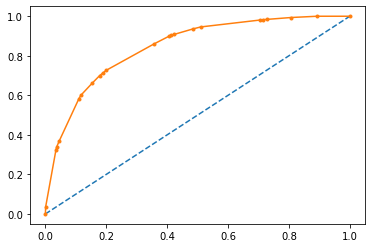

In [23]:
# AUC and ROC for the training data

# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.804


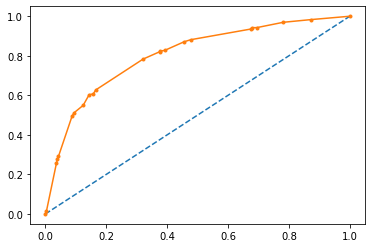

In [24]:
# AUC and ROC for the test data


# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(classification_report(train_labels, ytrain_predict1))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1471
           1       0.69      0.60      0.64       629

    accuracy                           0.80      2100
   macro avg       0.76      0.74      0.75      2100
weighted avg       0.79      0.80      0.79      2100



In [27]:
print(classification_report(test_labels, ytest_predict1))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       605
           1       0.73      0.51      0.60       295

    accuracy                           0.78       900
   macro avg       0.76      0.71      0.72       900
weighted avg       0.77      0.78      0.76       900



In [28]:
confusion_matrix(train_labels, ytrain_predict1)

array([[1299,  172],
       [ 251,  378]], dtype=int64)

In [29]:
confusion_matrix(test_labels, ytest_predict1)

array([[548,  57],
       [144, 151]], dtype=int64)

In [30]:
reg_dt_model.score(X_train,train_labels)

0.7985714285714286

In [31]:
reg_dt_model.score(X_test,test_labels)

0.7766666666666666

In [33]:
import seaborn as sns
from scipy import stats
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from warnings import filterwarnings
filterwarnings("ignore")

In [34]:
#choosing a correct value of Max depth
accuracy_values_on_test=[]
for depth in range(2,30,3):
    model = DecisionTreeClassifier(criterion = 'gini',random_state=1,max_depth=depth)
    model.fit(X_train, train_labels)
    y_predict=model.predict(X_test)
    accuracy_values_on_test.append(accuracy_score(test_labels,y_predict))

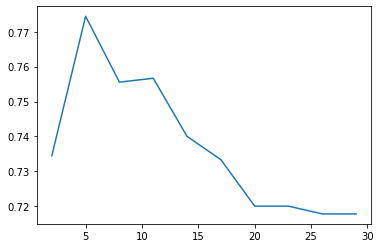

In [35]:
plt.plot(range(2,30,3), accuracy_values_on_test)

In [36]:
best_model = DecisionTreeClassifier(criterion = 'gini',random_state=1,max_depth=4)
best_model.fit(X_train, train_labels)
y_predict=best_model.predict(X_test)
accuracy_score(test_labels,y_predict)

0.7811111111111111

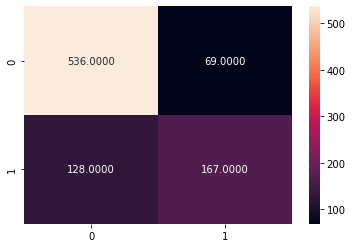

In [37]:
sns.heatmap(confusion_matrix(test_labels, y_predict),annot=True,fmt='.4f');

In [38]:
ytrain_predict1 = best_model.predict(X_train)
ytest_predict1 = best_model.predict(X_test)

In [57]:
ytrain_predict1

array([0, 0, 1, ..., 0, 0, 1], dtype=int8)

In [58]:
ytest_predict1

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [39]:
ytrain_predict2 = best_model.predict_proba(X_train)
ytest_predict2 = best_model.predict_proba(X_test)

In [62]:
pd.DataFrame(ytrain_predict2).head(10)

,0,1
0,0.909091,0.090909
1,0.700246,0.299754
2,0.233716,0.766284
3,0.452055,0.547945
4,0.400000,0.600000
5,0.452055,0.547945
6,0.700246,0.299754
7,0.935714,0.064286
8,0.952941,0.047059
9,0.700246,0.299754


In [60]:
pd.DataFrame(ytest_predict2).head(10)

,0,1
0,0.935714,0.064286
1,0.452055,0.547945
2,0.452055,0.547945
3,0.233716,0.766284
4,0.952941,0.047059
5,0.700246,0.299754
6,0.952941,0.047059
7,0.700246,0.299754
8,0.700246,0.299754
9,0.452055,0.547945


In [61]:
pd.DataFrame(ytest_predict2).tail(10)

,0,1
890,0.774775,0.225225
891,0.952941,0.047059
892,0.909091,0.090909
893,0.452055,0.547945
894,0.909091,0.090909
895,0.952941,0.047059
896,0.909091,0.090909
897,0.452055,0.547945
898,0.952941,0.047059
899,0.952941,0.047059


AUC: 0.833


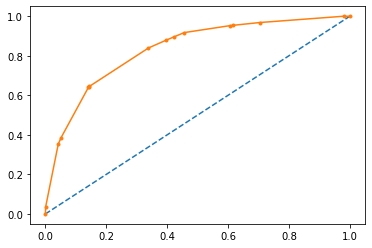

In [40]:
# AUC and ROC for the training data

# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.798


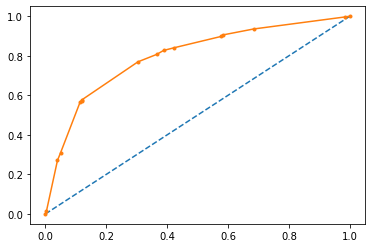

In [41]:
# AUC and ROC for the test data


# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [42]:
print(classification_report(train_labels, ytrain_predict1))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1471
           1       0.66      0.64      0.65       629

    accuracy                           0.79      2100
   macro avg       0.75      0.75      0.75      2100
weighted avg       0.79      0.79      0.79      2100



In [43]:
print(classification_report(test_labels, ytest_predict1))

              precision    recall  f1-score   support

           0       0.81      0.89      0.84       605
           1       0.71      0.57      0.63       295

    accuracy                           0.78       900
   macro avg       0.76      0.73      0.74       900
weighted avg       0.77      0.78      0.77       900



In [44]:
confusion_matrix(train_labels, ytrain_predict1)

array([[1263,  208],
       [ 226,  403]], dtype=int64)

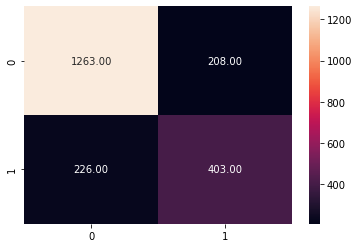

In [55]:
sns.heatmap(confusion_matrix(train_labels, ytrain_predict1),annot=True,fmt='.2f');

In [45]:
confusion_matrix(test_labels, ytest_predict1)

array([[536,  69],
       [128, 167]], dtype=int64)

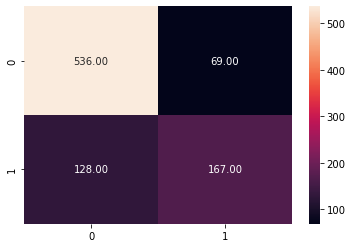

In [56]:
sns.heatmap(confusion_matrix(test_labels, ytest_predict1),annot=True,fmt='.2f');

In [46]:
best_model.score(X_train,train_labels)

0.7933333333333333

In [47]:
best_model.score(X_test,test_labels)

0.7811111111111111

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_leaf': [5, 15, 20, 25],
    'min_samples_split': [15, 30, 45, 60]
}

dt_model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 4)

In [49]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [5, 15, 20, 25],
                         'min_samples_split': [15, 30, 45, 60]})

In [50]:
grid_search.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 45}

In [51]:
best_grid = grid_search.best_estimator_

In [52]:
ytrain_predict3 = best_grid.predict(X_train)
ytest_predict3 = best_grid.predict(X_test)

In [53]:
print(classification_report(train_labels,ytrain_predict3))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1471
           1       0.66      0.64      0.65       629

    accuracy                           0.79      2100
   macro avg       0.75      0.75      0.75      2100
weighted avg       0.79      0.79      0.79      2100



In [54]:
print(classification_report(test_labels,ytest_predict3))

              precision    recall  f1-score   support

           0       0.81      0.89      0.84       605
           1       0.71      0.57      0.63       295

    accuracy                           0.78       900
   macro avg       0.76      0.73      0.74       900
weighted avg       0.77      0.78      0.77       900

